# Data Understanding, Preparation and EDA

## Importing the data

In [1575]:
# libraries and packages will be added to this cell as and when they are needed.
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

In [1576]:
pd.set_option('display.max_columns',None) 

In [1577]:
leads = pd.read_csv("leads.csv")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Inspecting the dataframe

In [1578]:
leads.shape

(9240, 37)

In [1579]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [1580]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [1581]:
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

###### As we can see from the head function, some of the columns have 'select' filled in as their values. That means that the person didn't choose the values they wanted to enter and hence can be replaced by a null(NaN) value.

In [1582]:
columns = list(leads.columns)

In [1583]:
for column in columns:
    if 'Select' in leads[column].values:
        print(column)

Specialization
How did you hear about X Education
Lead Profile
City


In [1584]:
leads = leads.replace('Select',np.nan)

In [1585]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


#### dropping the columns "lead number" and" prospect ID" as they serve no purpose

In [1586]:
leads.drop(columns=['Prospect ID','Lead Number'],inplace=True)

###### now that all the Select values have been converted to null values, we'll drop the columns with more than 30% null values

In [1587]:
lead_null_percentage = leads.isnull().sum()/len(leads)*100

In [1588]:
lead_null_percentage.sort_values()

Lead Origin                                       0.000000
I agree to pay the amount through cheque          0.000000
Get updates on DM Content                         0.000000
Update me on Supply Chain Content                 0.000000
Receive More Updates About Our Courses            0.000000
Through Recommendations                           0.000000
Digital Advertisement                             0.000000
Newspaper                                         0.000000
A free copy of Mastering The Interview            0.000000
Newspaper Article                                 0.000000
Magazine                                          0.000000
Search                                            0.000000
X Education Forums                                0.000000
Last Notable Activity                             0.000000
Do Not Email                                      0.000000
Total Time Spent on Website                       0.000000
Converted                                         0.0000

In [1589]:
lead_null_percentage[lead_null_percentage>=30].index

Index(['Specialization', 'How did you hear about X Education', 'Tags',
       'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score'],
      dtype='object')

In [1590]:
leads.drop(columns = ['Specialization', 'How did you hear about X Education', 'Tags',
       'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score'], inplace=True)

In [1591]:
# checking if the columns have been dropped.
leads.shape

(9240, 25)

#### As seen above, the columns with more than 30% null values have been dropped. now, we need to see how to deal with the rest of the null values.

In [1592]:
lead_null_percentage_new = leads.isnull().sum()/len(leads)*100

In [1593]:
lead_null_percentage_new.sort_values()

Lead Origin                                       0.000000
I agree to pay the amount through cheque          0.000000
Get updates on DM Content                         0.000000
Update me on Supply Chain Content                 0.000000
Receive More Updates About Our Courses            0.000000
Through Recommendations                           0.000000
Digital Advertisement                             0.000000
Newspaper                                         0.000000
X Education Forums                                0.000000
Newspaper Article                                 0.000000
Magazine                                          0.000000
A free copy of Mastering The Interview            0.000000
Search                                            0.000000
Total Time Spent on Website                       0.000000
Converted                                         0.000000
Do Not Call                                       0.000000
Do Not Email                                      0.0000

#### For the remaining columns, I'll check the counts of all the values using the value_counts(normalize = True, dropna = False) so that I can get the percentage of all the values

In [1594]:
leads['What matters most to you in choosing a course'].value_counts(normalize=True,dropna=False)

Better Career Prospects      0.706494
NaN                          0.293182
Flexibility & Convenience    0.000216
Other                        0.000108
Name: What matters most to you in choosing a course, dtype: float64

#### As seen above, the option 'Better Career Pospects' has an overwhelming majority, so it makes sense to impute the NaN values with it. So, we'll use the fillna() command to fill the values

In [1595]:
leads['What matters most to you in choosing a course'].fillna('Better Career Prospects',inplace=True)

In [1596]:
leads['What matters most to you in choosing a course'].value_counts(normalize=True,dropna=False)

Better Career Prospects      0.999675
Flexibility & Convenience    0.000216
Other                        0.000108
Name: What matters most to you in choosing a course, dtype: float64

In [1597]:
leads['What is your current occupation'].value_counts(normalize=True,dropna=False)

Unemployed              0.606061
NaN                     0.291126
Working Professional    0.076407
Student                 0.022727
Other                   0.001732
Housewife               0.001082
Businessman             0.000866
Name: What is your current occupation, dtype: float64

In [1598]:
leads['What is your current occupation'].fillna('Unemployed',inplace=True)

In [1599]:
leads['What is your current occupation'].value_counts(normalize=True,dropna=False)

Unemployed              0.897186
Working Professional    0.076407
Student                 0.022727
Other                   0.001732
Housewife               0.001082
Businessman             0.000866
Name: What is your current occupation, dtype: float64

In [1600]:
leads['Country'].value_counts(normalize=True,dropna=False)

India                   0.702597
NaN                     0.266342
United States           0.007468
United Arab Emirates    0.005736
Singapore               0.002597
Saudi Arabia            0.002273
United Kingdom          0.001623
Australia               0.001407
Qatar                   0.001082
Bahrain                 0.000758
Hong Kong               0.000758
Oman                    0.000649
France                  0.000649
unknown                 0.000541
Kuwait                  0.000433
South Africa            0.000433
Canada                  0.000433
Nigeria                 0.000433
Germany                 0.000433
Sweden                  0.000325
Philippines             0.000216
Uganda                  0.000216
Italy                   0.000216
Bangladesh              0.000216
Netherlands             0.000216
Asia/Pacific Region     0.000216
China                   0.000216
Belgium                 0.000216
Ghana                   0.000216
Kenya                   0.000108
Sri Lanka 

In [1601]:
leads['Country'].fillna('India',inplace=True)

In [1602]:
leads['Country'].value_counts(normalize=True,dropna=False)

India                   0.968939
United States           0.007468
United Arab Emirates    0.005736
Singapore               0.002597
Saudi Arabia            0.002273
United Kingdom          0.001623
Australia               0.001407
Qatar                   0.001082
Hong Kong               0.000758
Bahrain                 0.000758
Oman                    0.000649
France                  0.000649
unknown                 0.000541
South Africa            0.000433
Nigeria                 0.000433
Germany                 0.000433
Kuwait                  0.000433
Canada                  0.000433
Sweden                  0.000325
China                   0.000216
Asia/Pacific Region     0.000216
Uganda                  0.000216
Bangladesh              0.000216
Italy                   0.000216
Belgium                 0.000216
Netherlands             0.000216
Ghana                   0.000216
Philippines             0.000216
Russia                  0.000108
Switzerland             0.000108
Vietnam   

#### Since the remaining null columns have so less percentage of nulls, using the dropna function to drop all the rows with the null values shouldn't affect the data

In [1603]:
leads = leads.dropna()

In [1604]:
# Checking the shape of the cleaned data
leads.shape

(9074, 25)

## Exploratory Data Analysis

### Uni-Variate Analysis

I will create a separate dataframe which has all the categorical columns that we can run out analysis on

In [1605]:
categorical_vars = leads.drop(columns=['TotalVisits','Total Time Spent on Website','Page Views Per Visit'])

In [1606]:
categorical_vars.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,Last Activity,Country,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,Page Visited on Website,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
1,API,Organic Search,No,No,0,Email Opened,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,Email Opened,India,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,Unreachable,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,Converted to Lead,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified


In [1607]:
def countplot_univariate(column):
    plt.figure(figsize = (15,5))
    ax=sns.countplot(x = column, data = categorical_vars)
    plt.xticks(rotation = 90)
    plt.title(column,fontsize=20)
    plt.show()

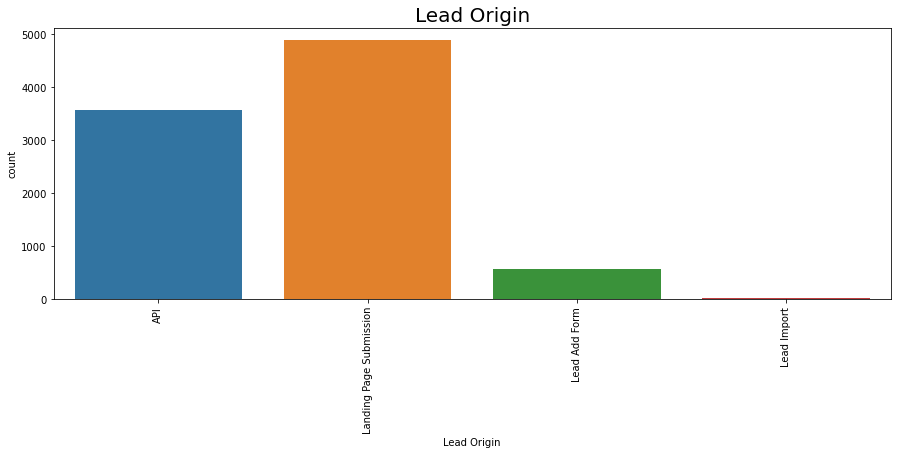

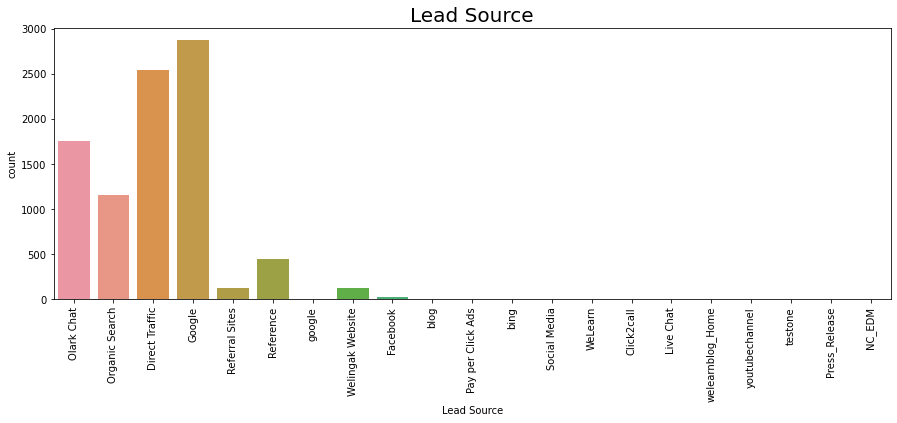

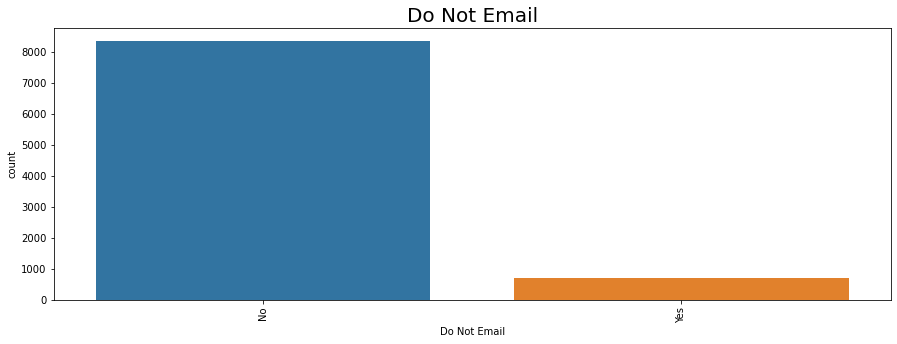

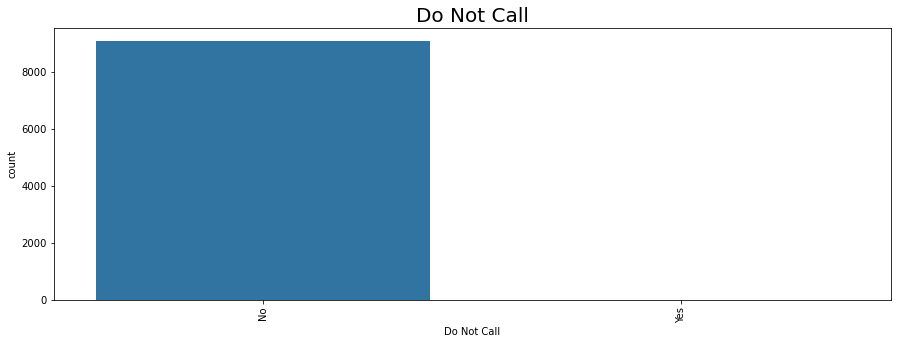

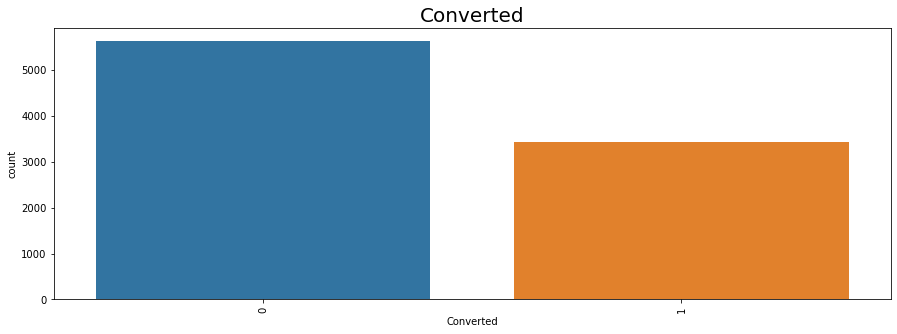

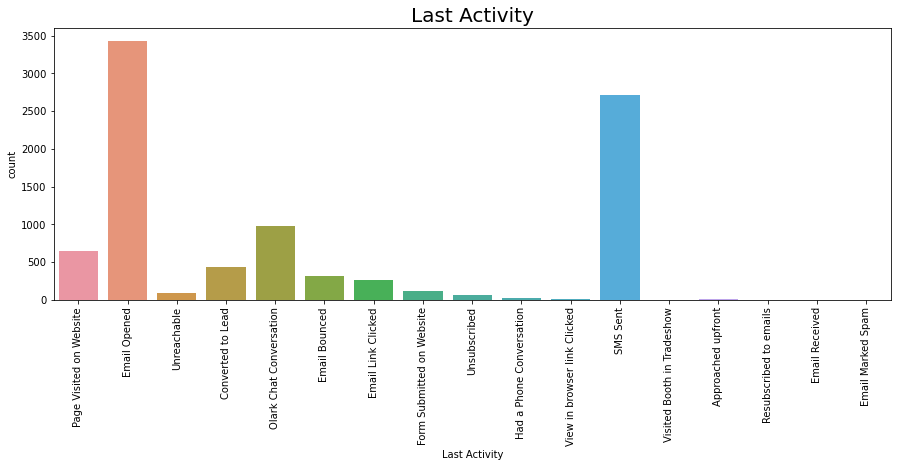

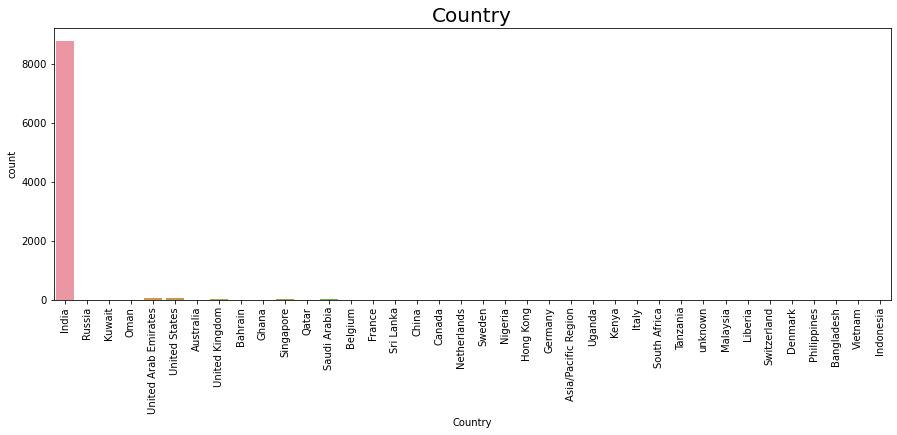

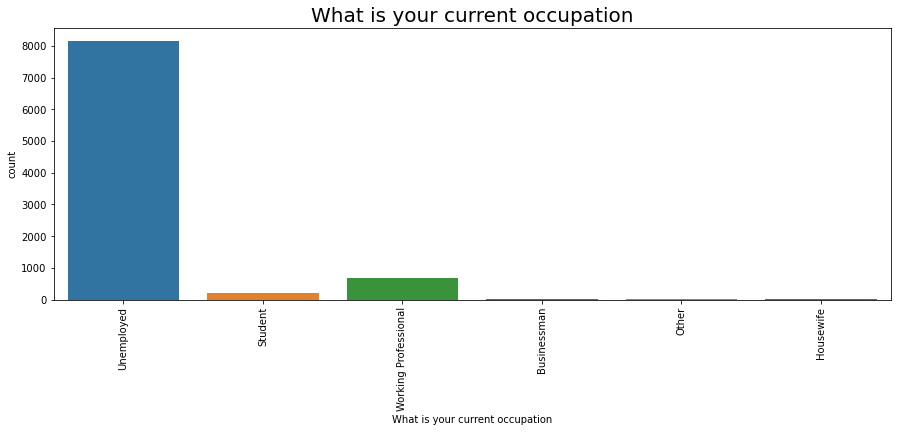

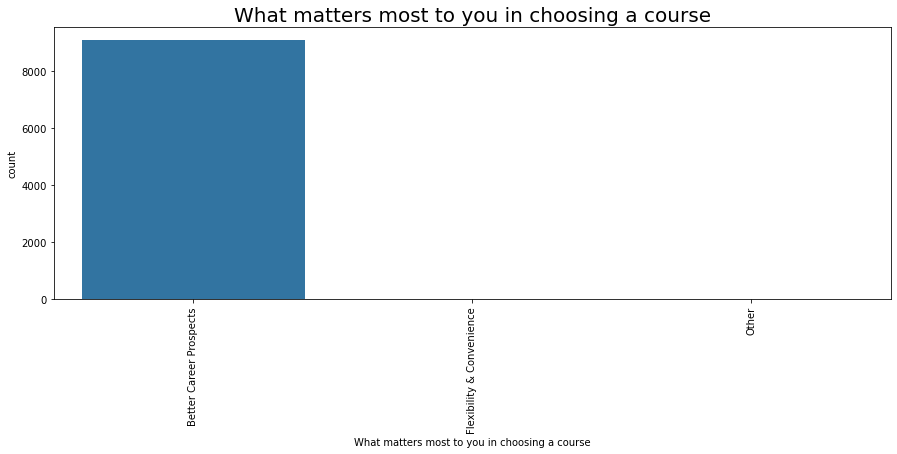

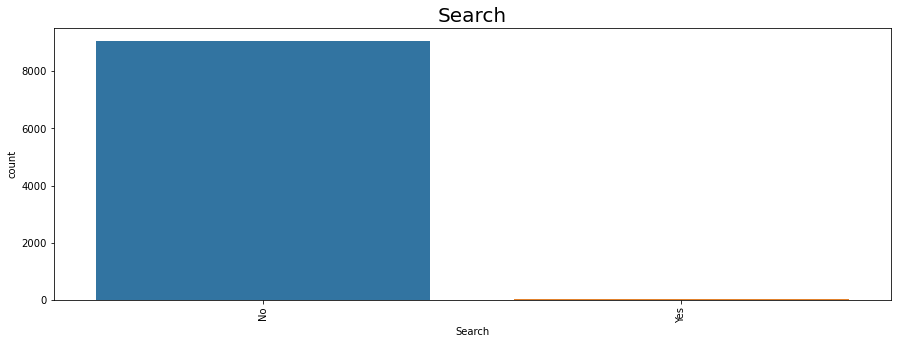

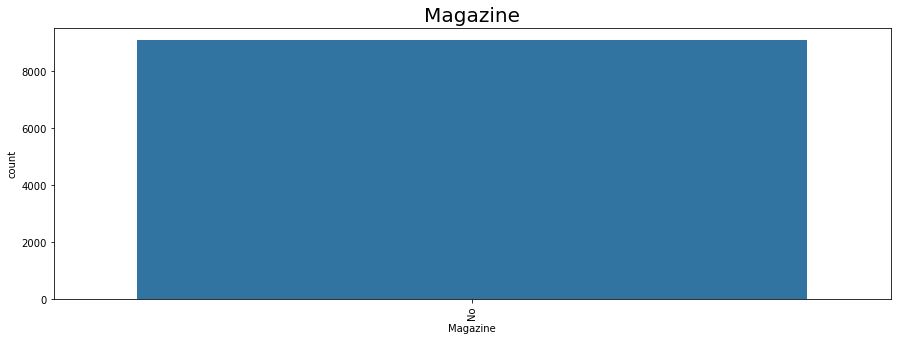

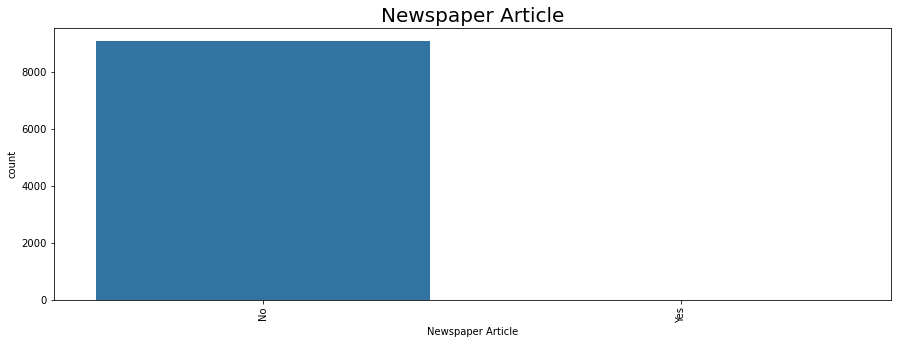

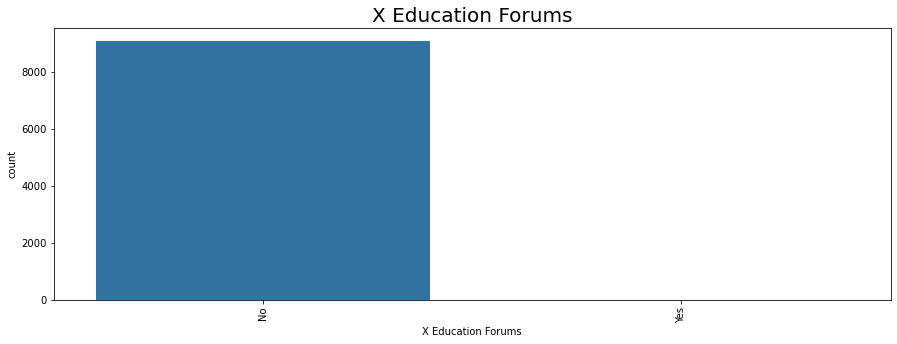

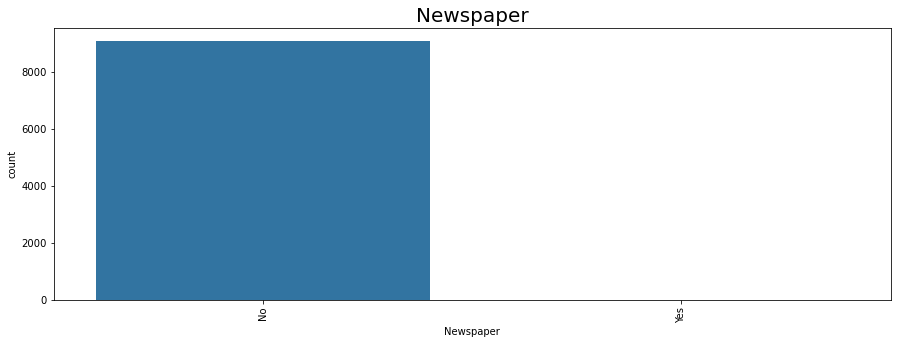

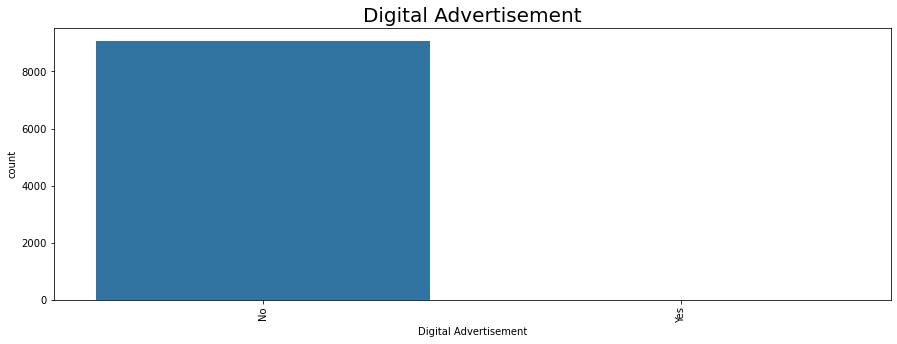

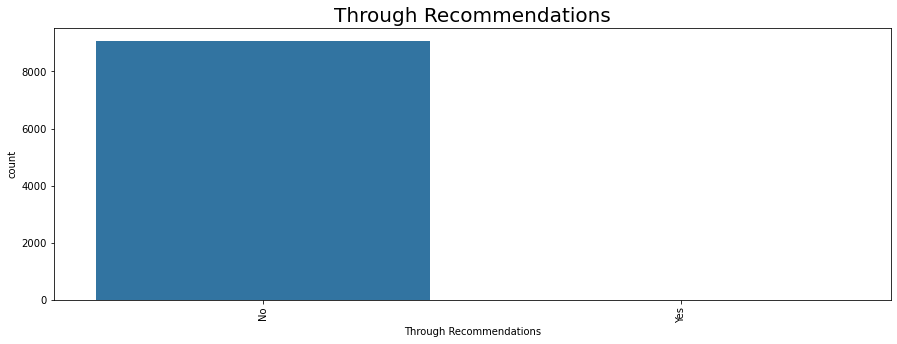

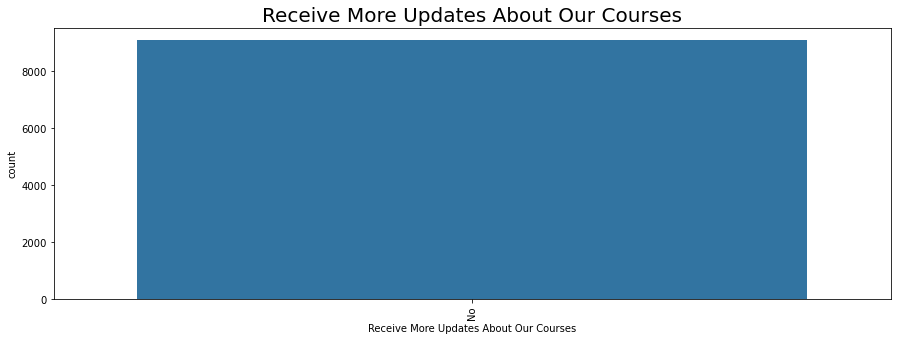

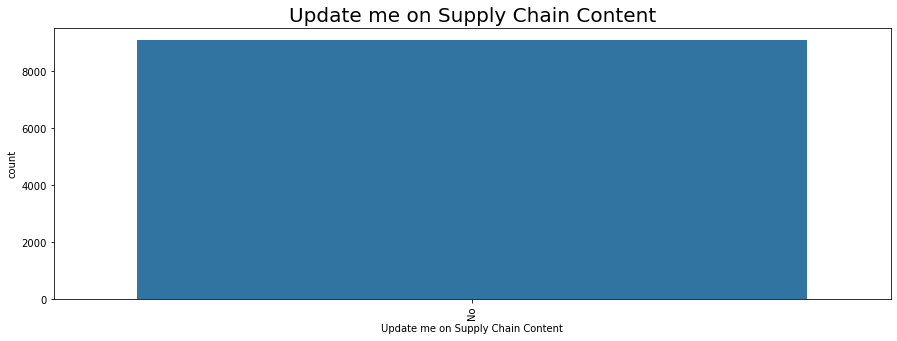

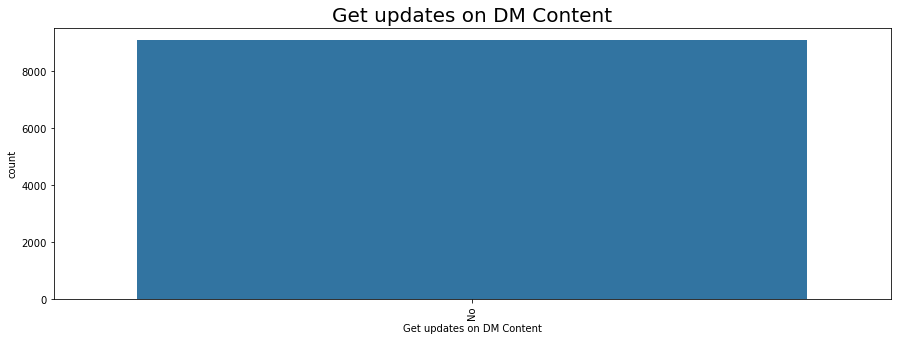

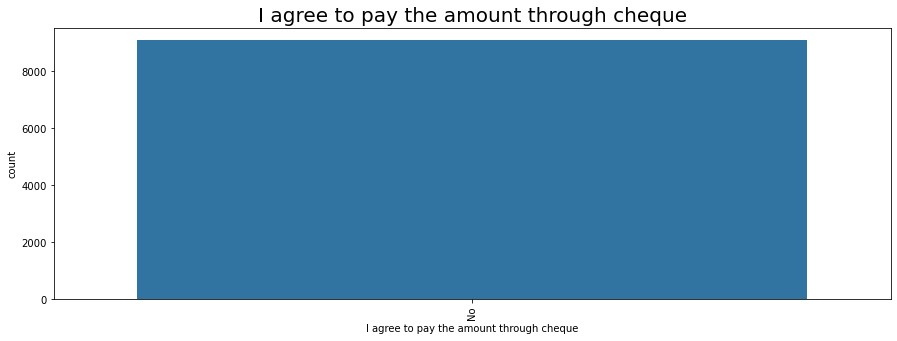

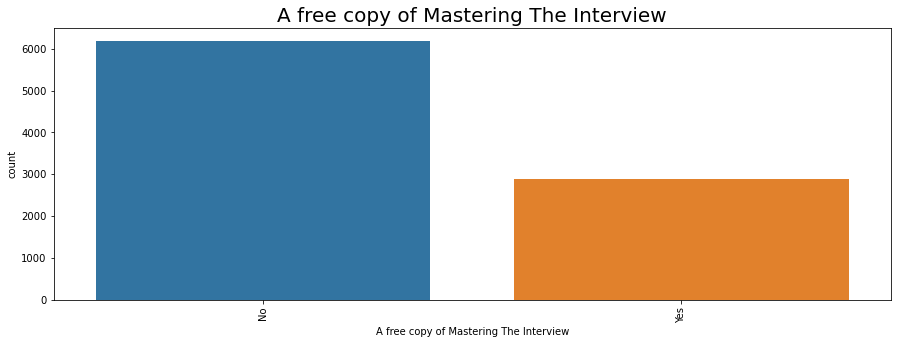

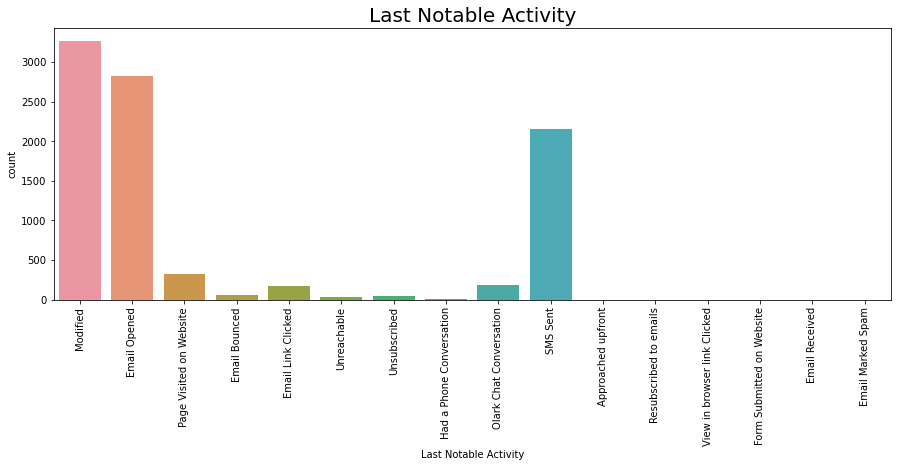

In [1608]:
for column in categorical_vars.columns:
    countplot_univariate(column)

#### Now, I will proceed to the analysis of the numeric variables

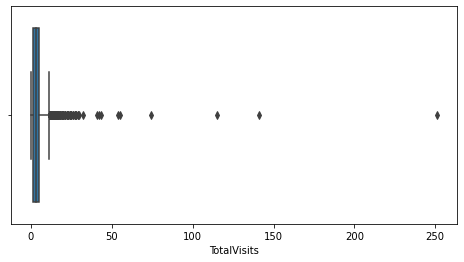

In [1609]:
# Plotting boxplot to visualize data distribution of 'TotalVisits'

plt.figure(figsize = (8,4))
sns.boxplot(leads['TotalVisits'])
plt.show()

#### so, since there a number of outliers present, I will cap the outliers at 99th percentile

In [1610]:
cap_99th_perc = leads['TotalVisits'].quantile(.99)

In [1611]:
leads = leads[(leads['TotalVisits']<=cap_99th_perc)]

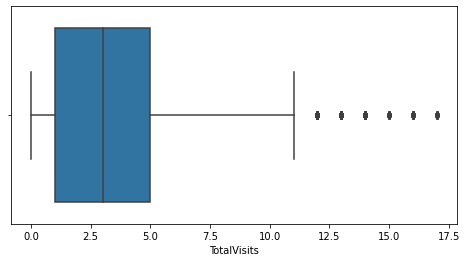

In [1612]:
# checking if the outliers are removed

plt.figure(figsize = (8,4))
sns.boxplot(leads['TotalVisits'])
plt.show()

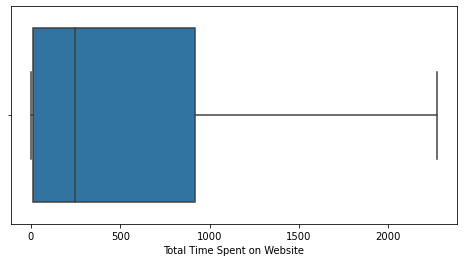

In [1613]:
# checking the Total Time Spent on Website

plt.figure(figsize = (8,4))
sns.boxplot(leads['Total Time Spent on Website'])
plt.show()

#### Since there are no outliers, I'll proceed to the final categorical column, i.e.  Page Views Per Visit

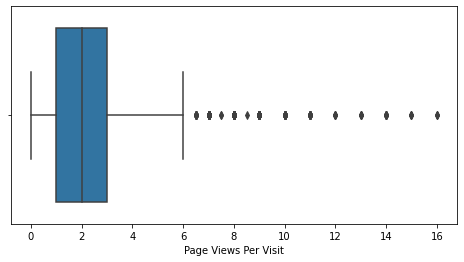

In [1614]:
plt.figure(figsize = (8,4))
sns.boxplot(leads['Page Views Per Visit'])
plt.show()

#### Since there are a lot of outlier present, I will use the same method to deal with it

In [1615]:
cap_99th_perc = leads['Page Views Per Visit'].quantile(.99)

In [1616]:
leads = leads[(leads['Page Views Per Visit']<=cap_99th_perc)]

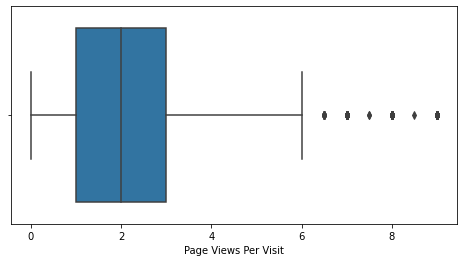

In [1617]:
# checking the outliers
plt.figure(figsize = (8,4))
sns.boxplot(leads['Page Views Per Visit'])
plt.show()

### Bi-Variate Analysis

In [1618]:
def countplot_bivariate(column):
    plt.figure(figsize = (15,5))
    ax=sns.countplot(x = column, hue = "Converted", data = categorical_vars)
    plt.xticks(rotation = 90)
    plt.title(column,fontsize=20)
    plt.show()

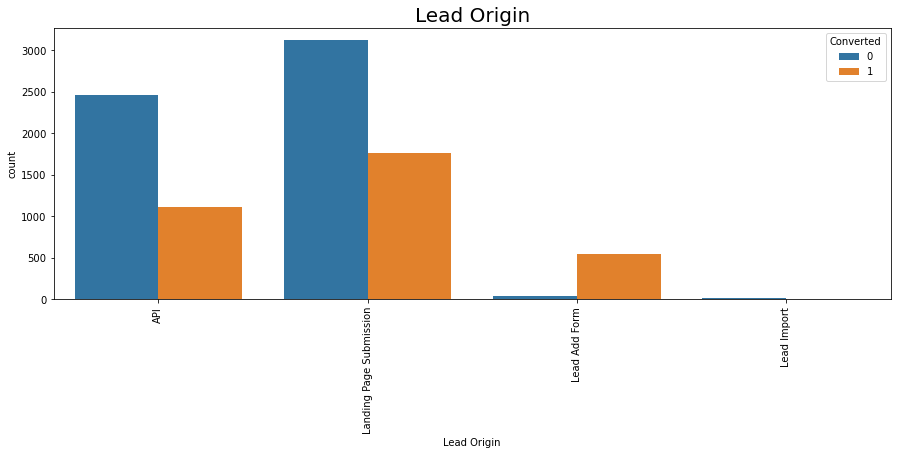

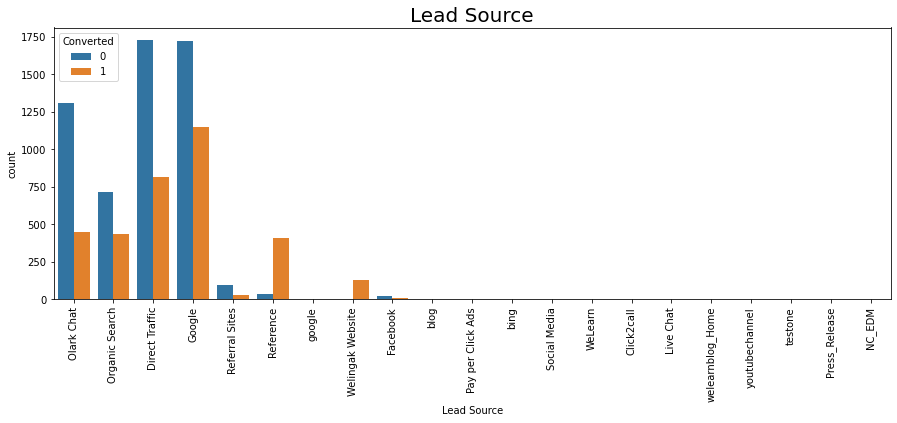

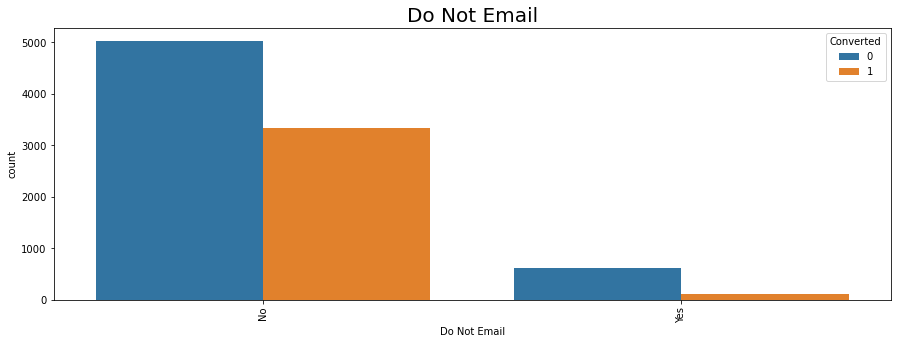

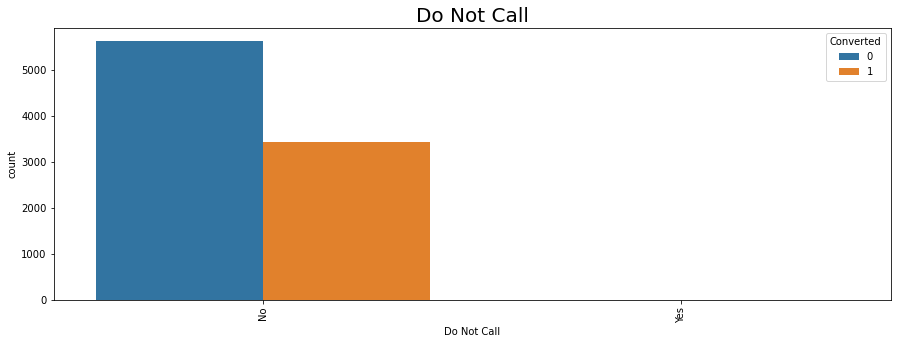

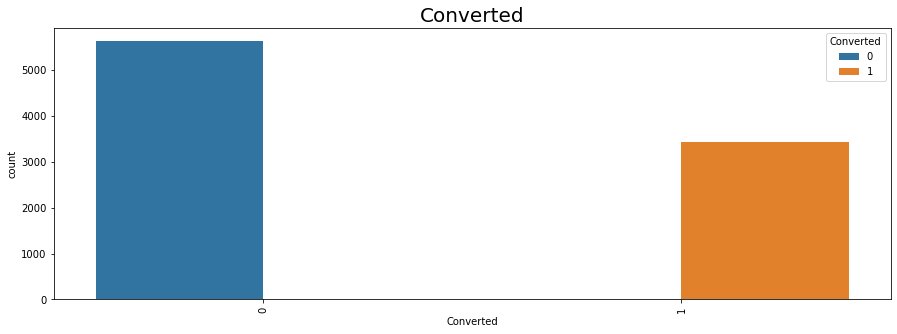

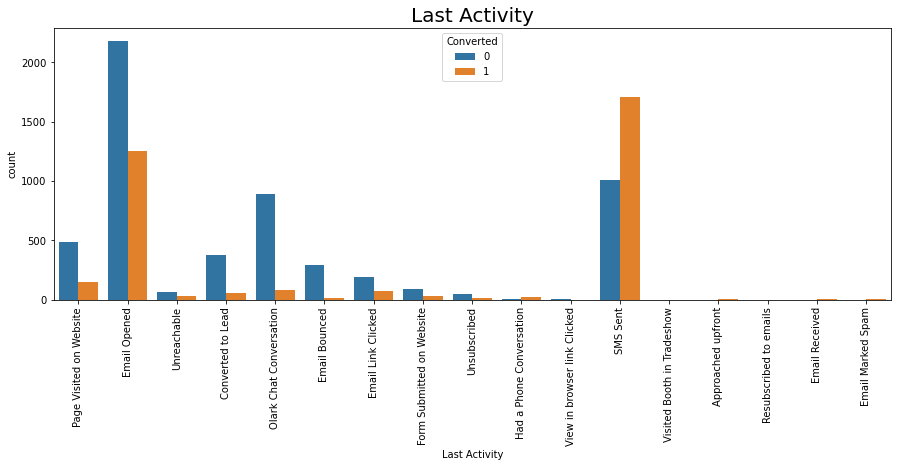

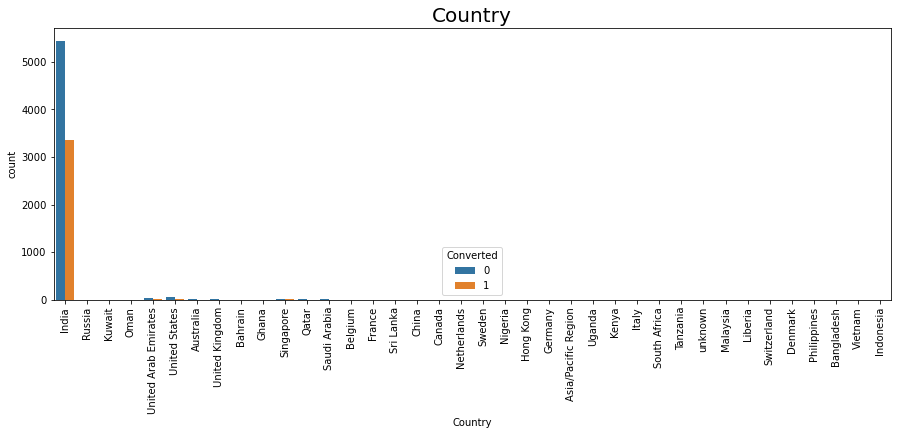

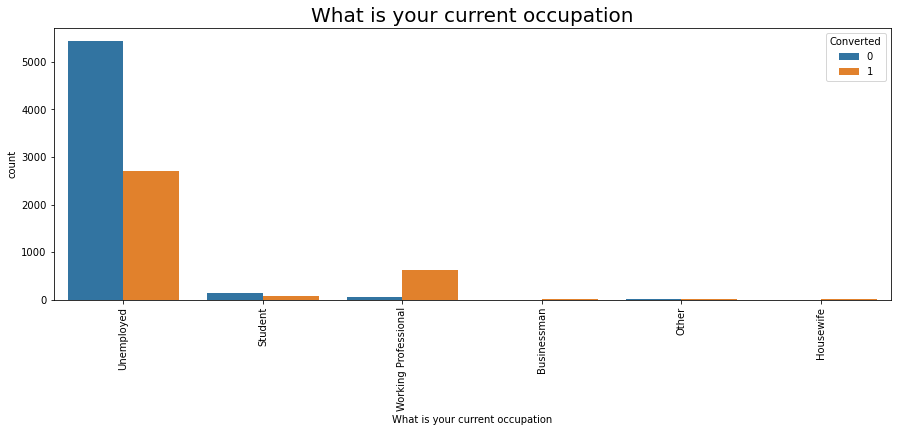

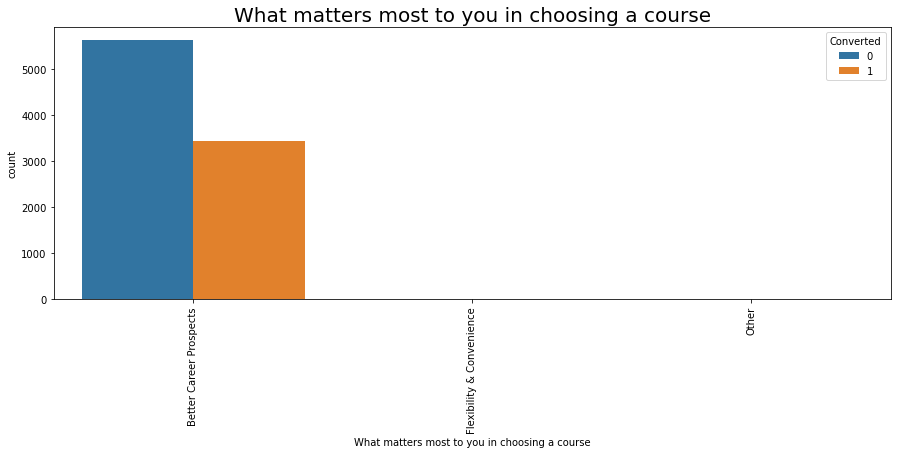

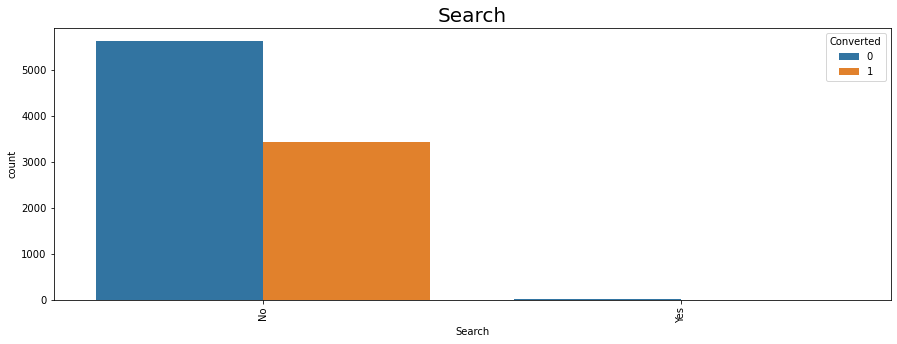

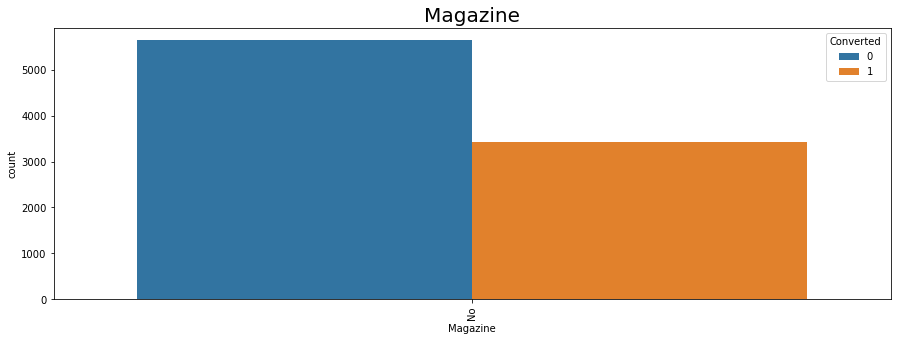

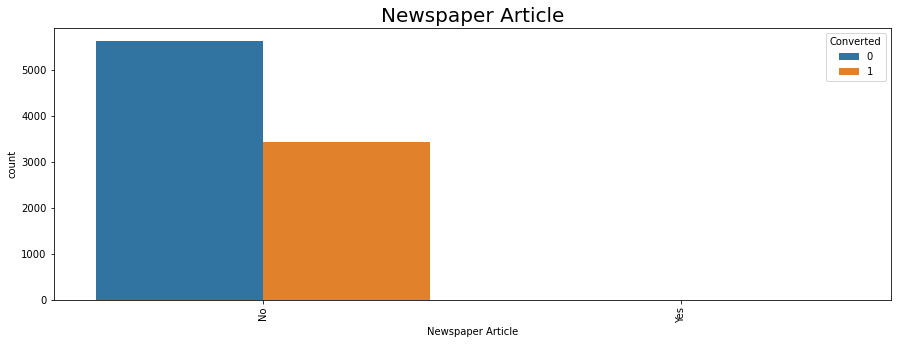

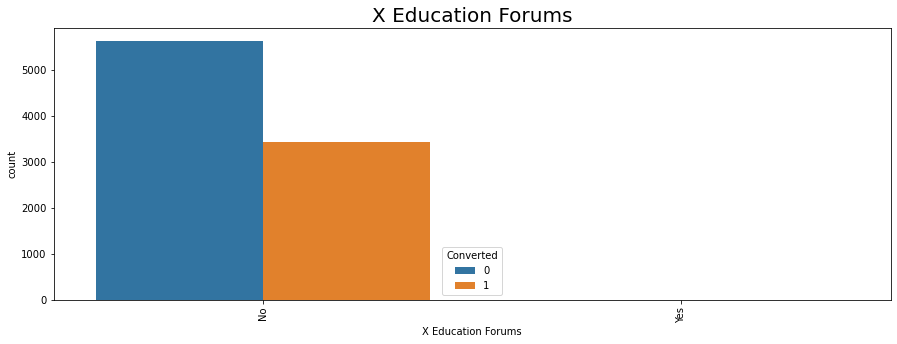

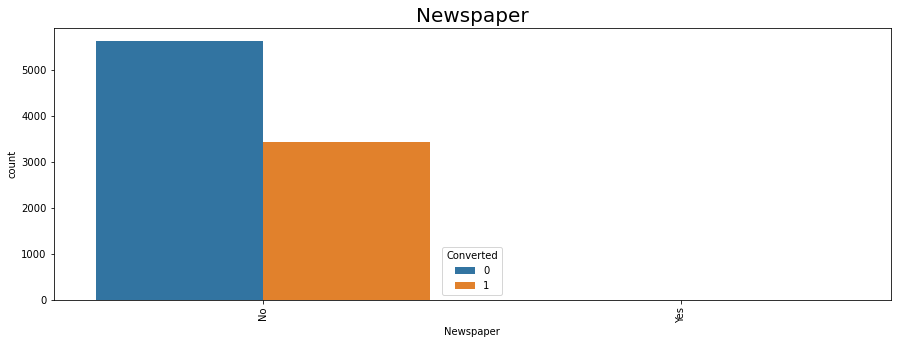

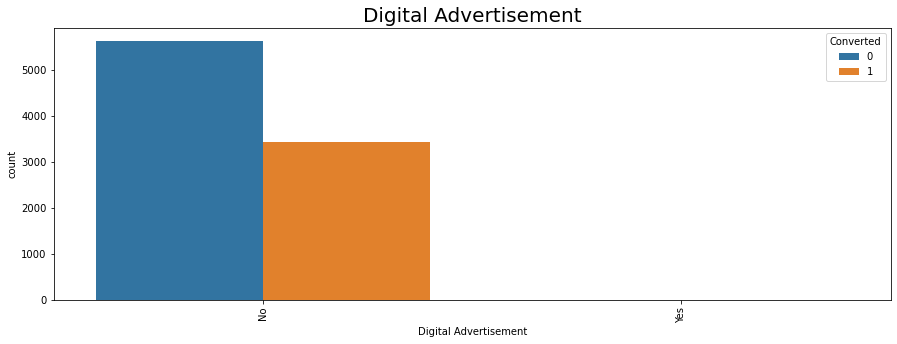

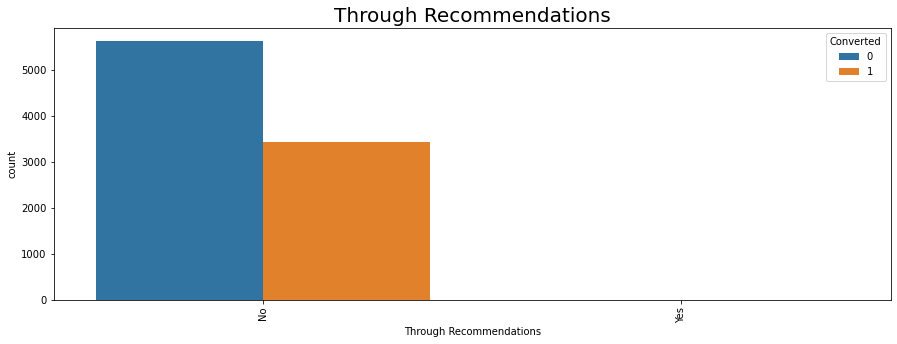

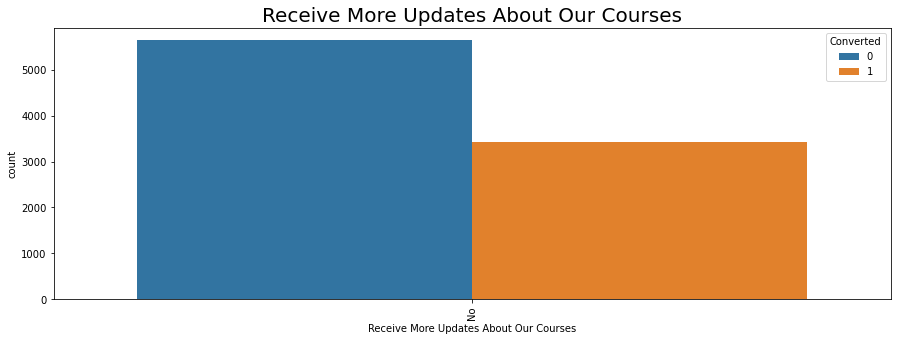

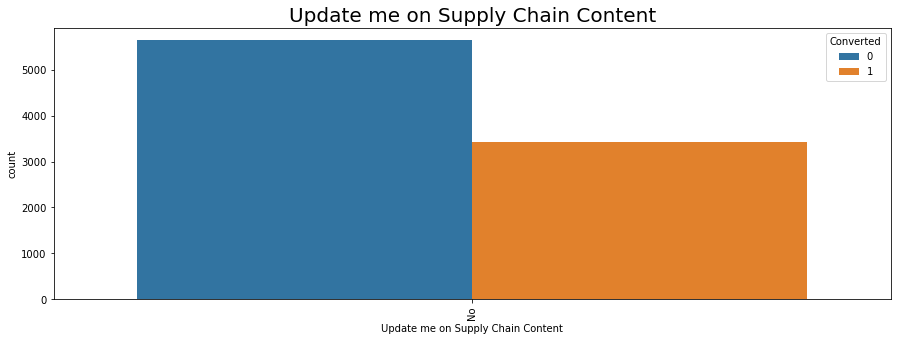

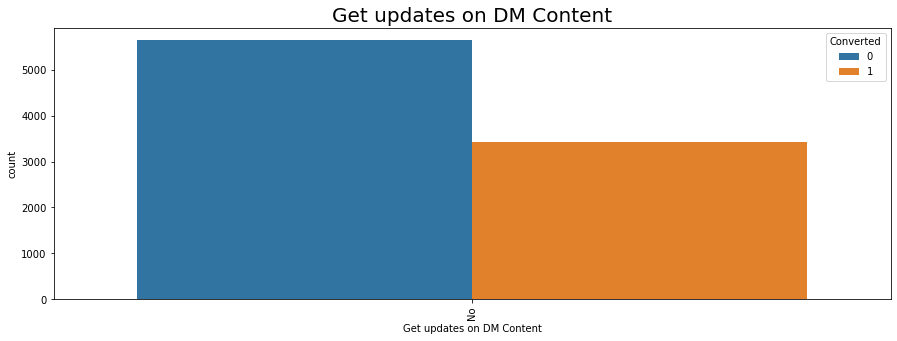

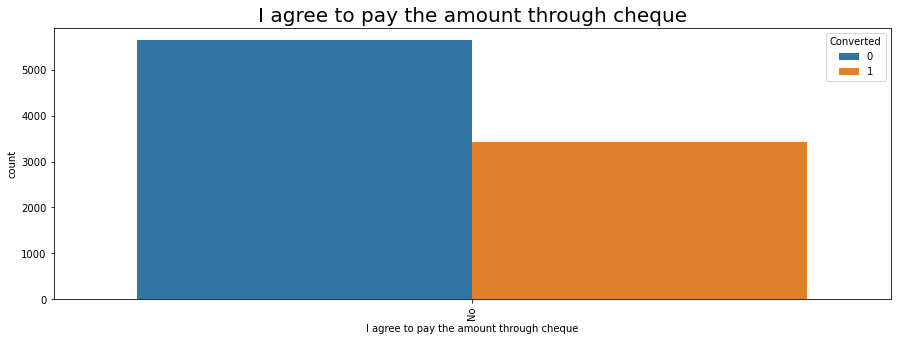

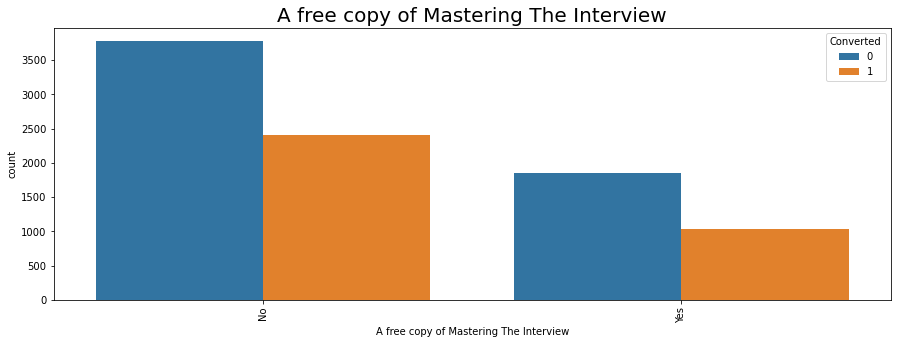

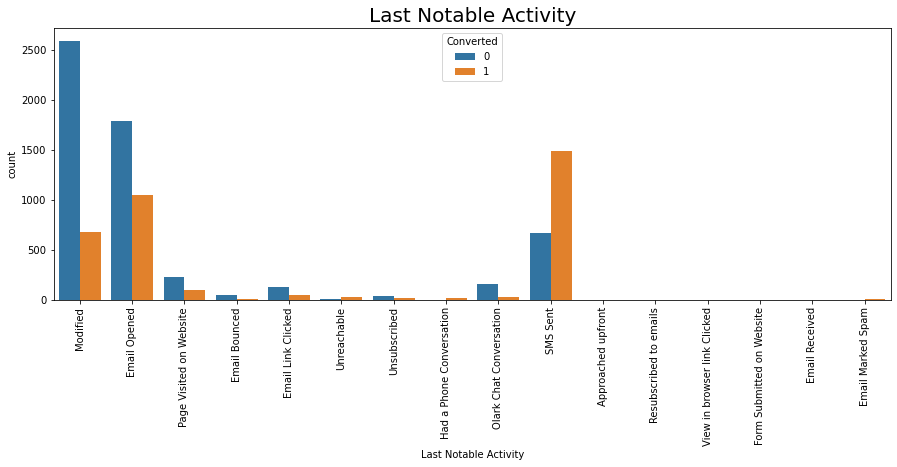

In [1619]:
for column in categorical_vars.columns:
    countplot_bivariate(column)

#### Bi-variate analysis for the numeric variables

In [1620]:
selected_cols = ['Converted', 'TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']

In [1621]:
leads_num = leads.loc[:,selected_cols]

In [1622]:
leads_num.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,0,0.0,0,0.0
1,0,5.0,674,2.5
2,1,2.0,1532,2.0
3,0,1.0,305,1.0
4,1,2.0,1428,1.0


<Figure size 1440x1440 with 0 Axes>

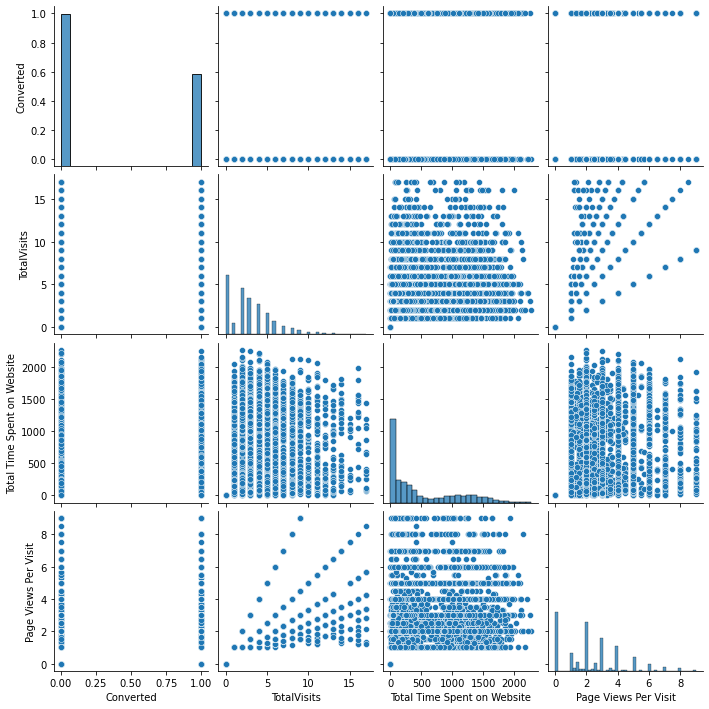

In [1623]:
# I will create a pairplot to check the relationship between the converted and the numeric columns
plt.figure(figsize=(20,20))
sns.pairplot(data=leads_num)
plt.show()

### After checking the Uni-variate and Bi-variate analysis of the dataset, Certain columns make no contribution to the dataset. These columns are :
#### Do Not Email
Since more than 8000 people have selected 'no' on 'Do Not Email', the information from this column cannot be used reliably
#### Do Not Call
This column is even more skewed since even more people have selected 'no' on the 'Do Not Call'.
#### Country
96.89% of the applicants are from this column, making it unreliable
#### What matters most to you in choosing a course
99.9% people in this column have selected 'Better Career Pospects' so it's safe to say that this isn't very reliable
#### Search
more than 9000 people have selected 'No' so I will drop this column as well
#### Magazine
all the People have selected 'No' on the Magazine
#### Newspaper Article
more than 9000 people have selected 'No' so I will drop this column as well
#### X Education Forums
more than 9000 people have selected 'No' so I will drop this column as well
#### Newspaper 
more than 9000 people have selected 'No' so I will drop this column as well
#### Digital Advertisement
more than 9000 people have selected 'No' so I will drop this column as well
#### Through Recommendations
more than 9000 people have selected 'No' so I will drop this column as well
#### Receive More Updates About Our Courses
all the People have selected 'No'
#### Get updates on DM Content 
all the People have selected 'No'
#### I agree to pay the amount through cheque
all the People have selected 'No'
#### Update me on Supply Chain Content
all the People have selected 'No'

In [1624]:
leads.drop(columns=['Do Not Email','Do Not Call','Magazine','Newspaper Article', 
             'X Education Forums','Newspaper','Digital Advertisement','Through Recommendations',
            'Receive More Updates About Our Courses','Get updates on DM Content','I agree to pay the amount through cheque',
            'Update me on Supply Chain Content','Search','What matters most to you in choosing a course','Country'],inplace=True)

In [1625]:
leads.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Unemployed,No,Modified
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Unemployed,No,Modified
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Unemployed,No,Modified


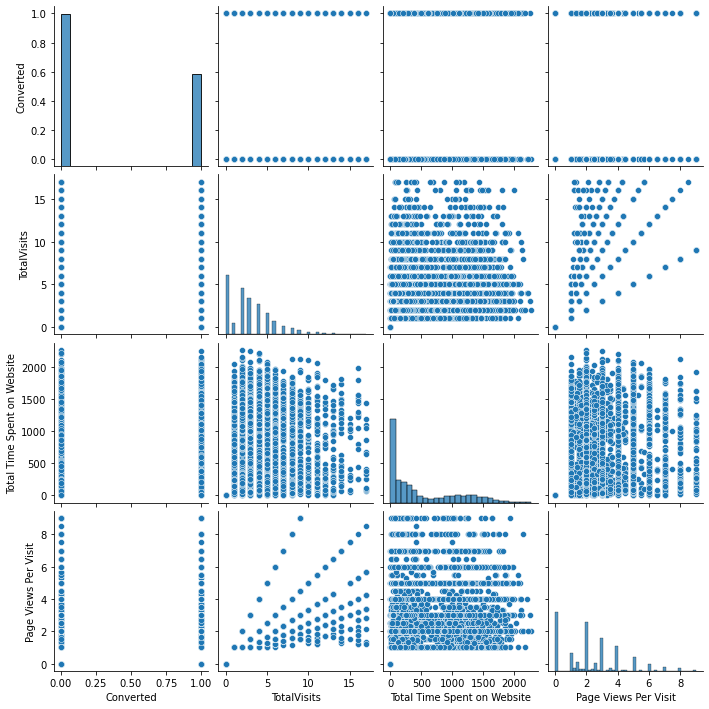

In [1626]:
sns.pairplot(data=leads)

## Converting the Categorical Variables

In [1627]:
# defining a function to map the columns
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

In [1628]:
#creating a list of variables to map
variables = ['A free copy of Mastering The Interview']

In [1629]:
leads[variables] = leads[variables].apply(binary_map)

#### Converting the variables with other than yes/no options into dummies and dropping the first variable

In [1630]:
dummy_Var = pd.get_dummies(leads, columns=['Last Notable Activity',
                               'What is your current occupation', 'Last Activity', 'Lead Source', 'Lead Origin']
                       , drop_first = True)

In [1631]:
leads = pd.concat([leads,dummy_Var],axis = 1)

In [1632]:
leads.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Unemployed,0,Modified,0,0.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Unemployed,0,Email Opened,0,5.0,674,2.5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Student,1,Email Opened,1,2.0,1532,2.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Unemployed,0,Modified,0,1.0,305,1.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Unemployed,0,Modified,1,2.0,1428,1.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [1633]:
#drop duplicate columns created during concat
leads = leads.T.drop_duplicates().T

#### Since I have created dummies for the categorical variables, I'll drop them.

In [1634]:
leads = leads.drop(columns=['Last Notable Activity','What is your current occupation', 'Last Activity',
                            'Lead Source', 'Lead Origin'],axis=1)

#### Running the data checks on the final DataFrame

In [1635]:
leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import
0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,1.0,305,1.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,2.0,1428,1.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [1636]:
leads.shape

(8924, 62)

In [1637]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8924 entries, 0 to 9239
Data columns (total 62 columns):
 #   Column                                                Non-Null Count  Dtype 
---  ------                                                --------------  ----- 
 0   Converted                                             8924 non-null   object
 1   TotalVisits                                           8924 non-null   object
 2   Total Time Spent on Website                           8924 non-null   object
 3   Page Views Per Visit                                  8924 non-null   object
 4   A free copy of Mastering The Interview                8924 non-null   object
 5   Last Notable Activity_Email Bounced                   8924 non-null   object
 6   Last Notable Activity_Email Link Clicked              8924 non-null   object
 7   Last Notable Activity_Email Marked Spam               8924 non-null   object
 8   Last Notable Activity_Email Opened                    8924 non-null 

In [1638]:
leads.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import
count,8924,8924.0,8924,8924.0,8924,8924,8924,8924,8924,8924,8924,8924,8924,8924,8924,8924,8924,8924,8924,8924,8924,8924,8924,8924,8924,8924,8924,8924,8924,8924,8924,8924,8924,8924,8924,8924,8924,8924,8924,8924,8924,8924,8924,8924,8924,8924,8924,8924,8924,8924,8924,8924,8924,8924,8924,8924,8924,8924,8924,8924,8924,8924
unique,2,18.0,1705,66.0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
freq,5555,2161.0,2165,2161.0,6126,8865,8754,8922,6139,8923,8923,8911,5703,8742,8636,8923,6801,8892,8880,8923,8915,8911,8721,8027,8259,8496,8614,8660,5539,8922,8810,8900,7958,8330,6246,8836,8866,8920,8923,6425,8893,6088,8922,8923,7173,7832,8923,8923,8482,8807,8922,8923,8795,8918,8923,8919,8923,8923,8923,4768,8344,8894


In [1639]:
leads = leads.astype(int)

In [1640]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8924 entries, 0 to 9239
Data columns (total 62 columns):
 #   Column                                                Non-Null Count  Dtype
---  ------                                                --------------  -----
 0   Converted                                             8924 non-null   int32
 1   TotalVisits                                           8924 non-null   int32
 2   Total Time Spent on Website                           8924 non-null   int32
 3   Page Views Per Visit                                  8924 non-null   int32
 4   A free copy of Mastering The Interview                8924 non-null   int32
 5   Last Notable Activity_Email Bounced                   8924 non-null   int32
 6   Last Notable Activity_Email Link Clicked              8924 non-null   int32
 7   Last Notable Activity_Email Marked Spam               8924 non-null   int32
 8   Last Notable Activity_Email Opened                    8924 non-null   int32
 9

## Train-Test-Split

#### deviding the data into the X and y variables

In [1641]:
X = leads.drop(columns=['Converted'],axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5,674,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,1532,2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,305,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,2,1428,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [1642]:
y = leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int32

#### Splitting the data into train and test in 70:30 ratio

In [1643]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

In [1644]:
# checking the shape of X_train and y_train to check the split
X_train.shape

(6246, 61)

In [1645]:
X_test.shape

(2678, 61)

## Feature Scaling

#### I will scale the features using the Standard Scaler before making the correlation matrix and checking the collinearity between the variables

In [1646]:
scaler = StandardScaler()

In [1647]:
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [1648]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import
7183,-1.078136,-0.886562,-1.160391,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1798,-1.078136,-0.886562,-1.160391,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1233,-1.078136,-0.886562,-1.160391,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2419,0.630837,-0.665693,1.480744,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7305,-0.394547,-0.132686,-0.103937,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


## Correlation Matrix

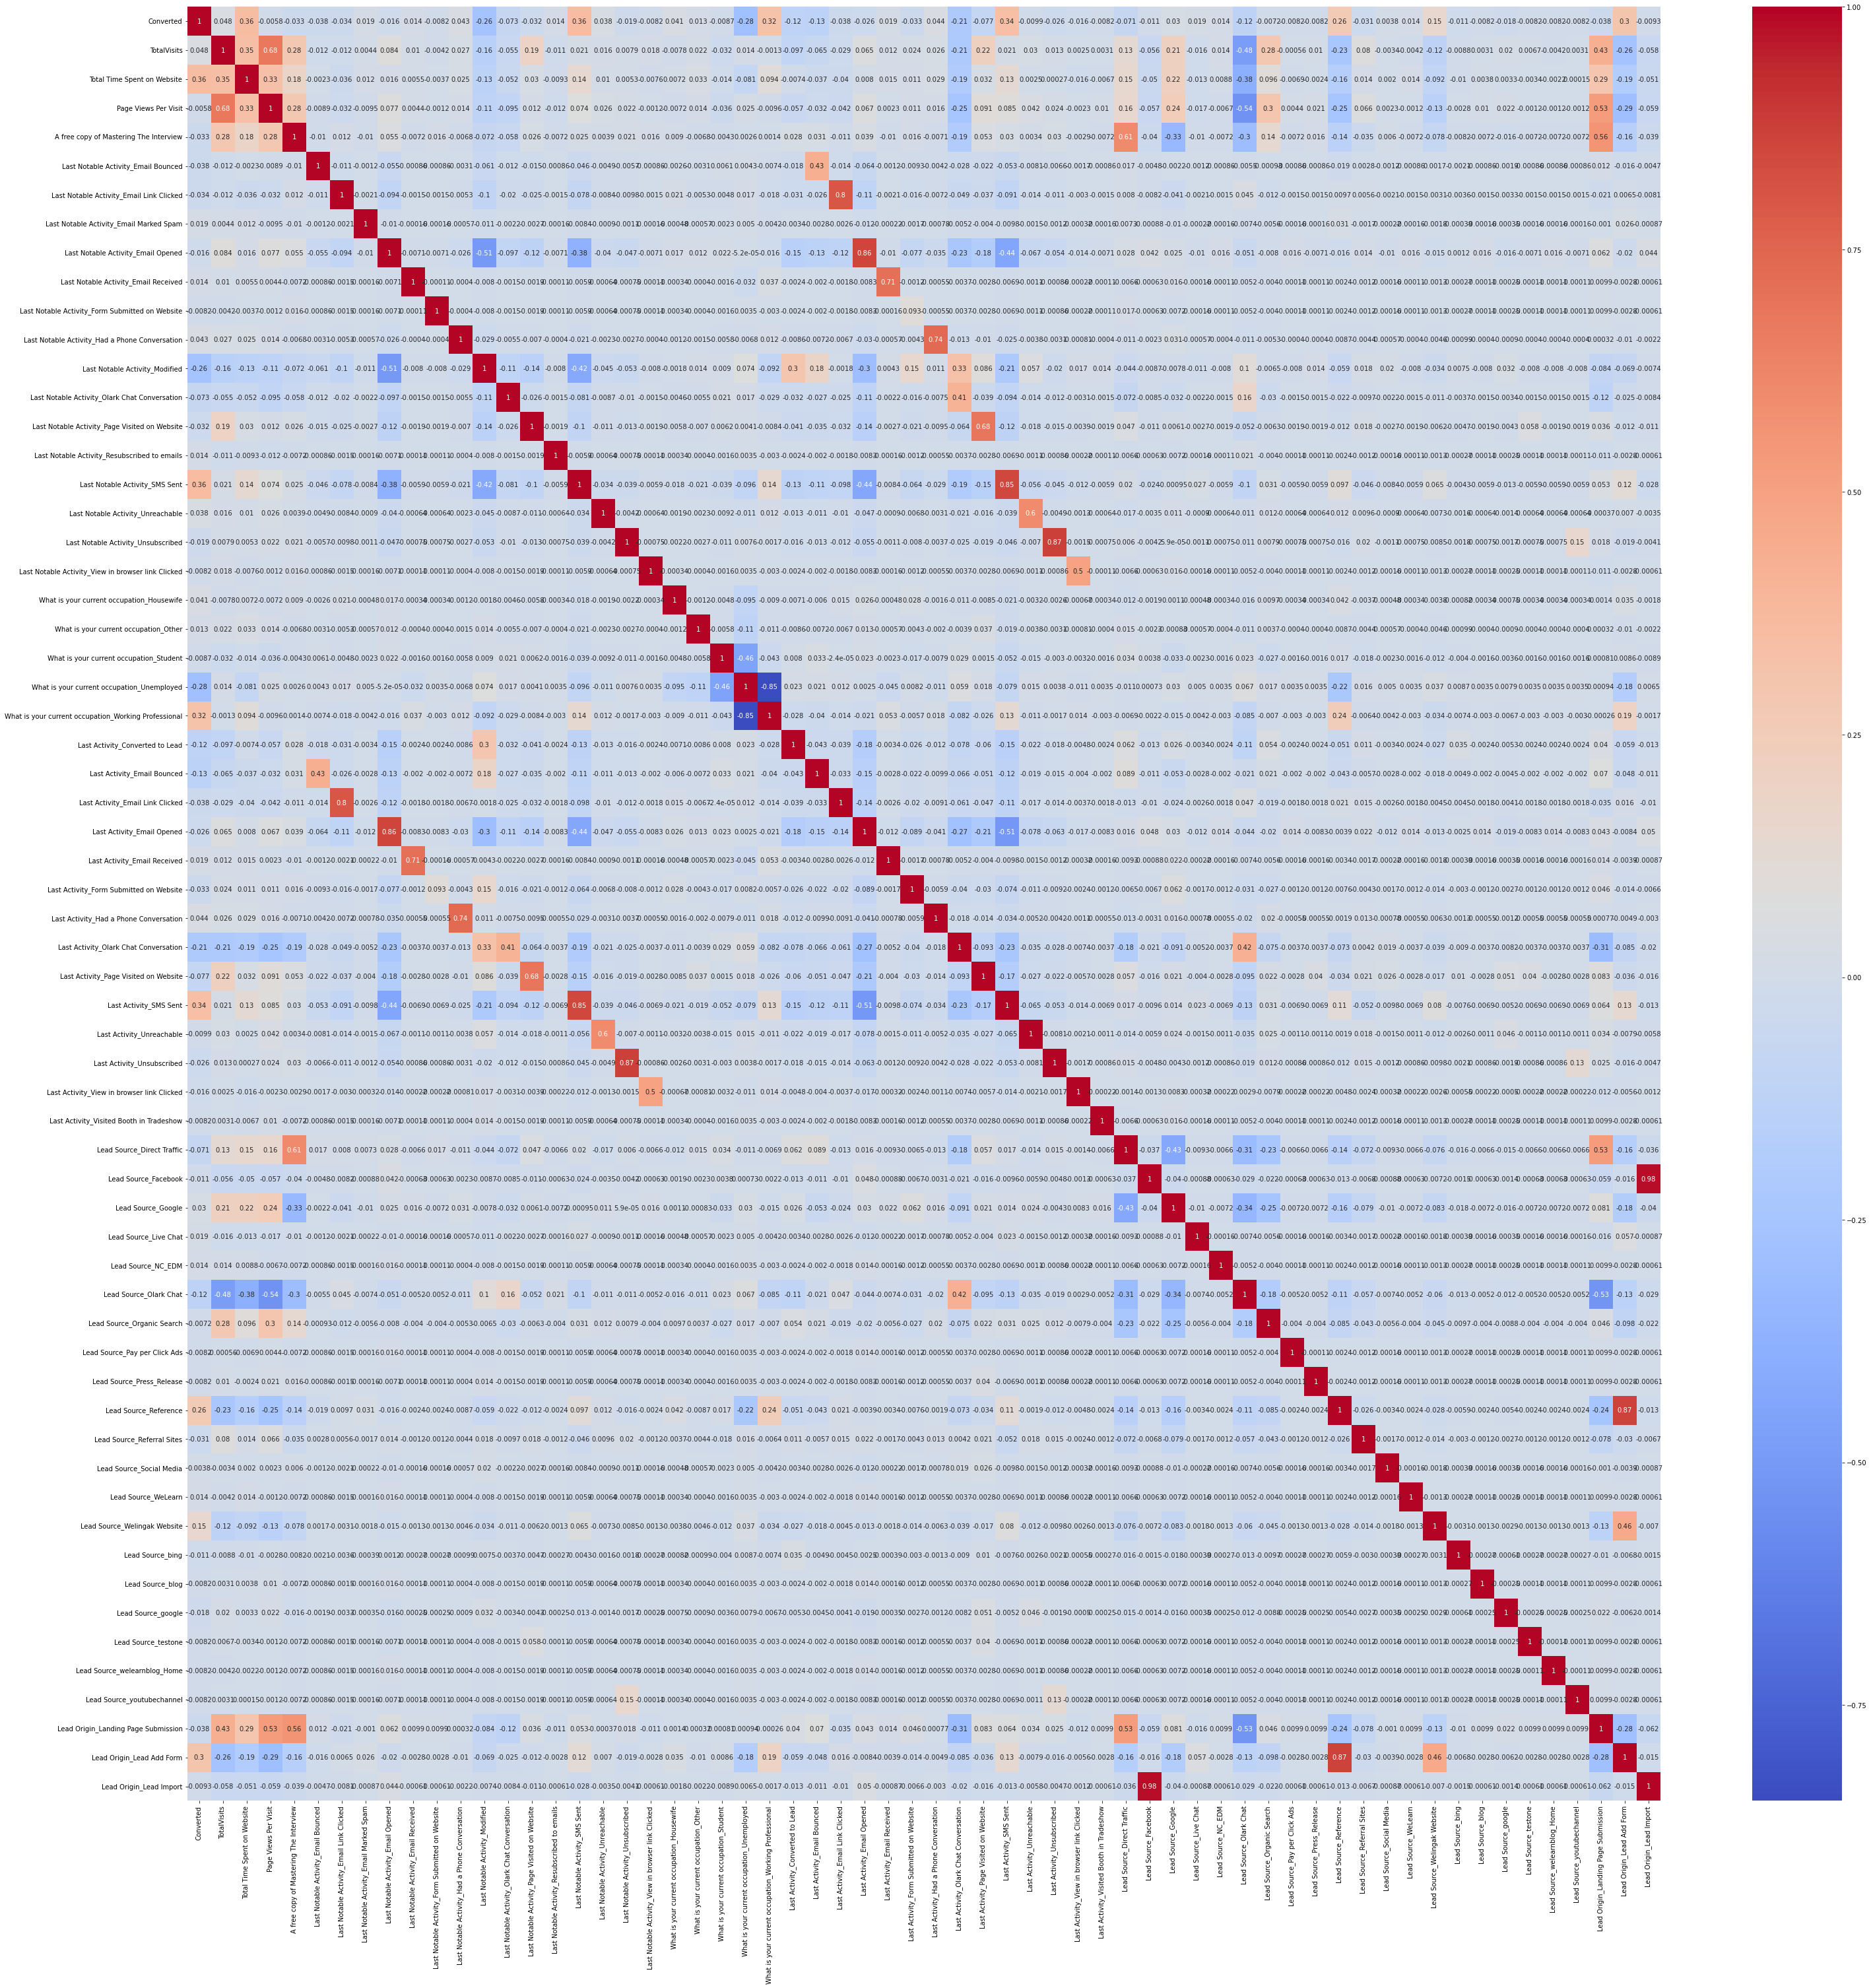

In [1649]:
# checking out the correlation matrix
plt.figure(figsize=(50,50))
sns.heatmap(data=leads.corr(), annot = True, cmap="coolwarm")
plt.show()

## Model Building

In [1650]:
model_1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
model_1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6189
Model Family:                Binomial   Df Model:                           56
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Wed, 12 Apr 2023   Deviance:                   1.4589e+05
Time:                        00:01:34   Pearson chi2:                 7.13e+18
No. Iterations:                    94   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                 2.056e+15   6.91e+07   2.98e+07      0.000    2.06e+15    2.06e+15
TotalVisits                                           1.807e+14   1.28e+06   1.41e+08      0.000    1.81e+14    1.81e+14
Total Time Spent on Website                           8.674e+14   9.88e+05   8.78e+08      0.000    8.67e+14    8.67e+14
Page Views Per Visit                                 -1.696e+14   1.37e+06  -1.24e+08      0.000    -1.7e+14    -1.7e+14
A free copy of Mastering The Interview               -1.701e+13   2.69e+06  -6.33e+06      0.000    -1.7e+13    -1.7e+13
Last Notable Activity_Email Bounced                   8.701e+14   8.31e+07   1.05e+07      0.000     8.7e+14     8.7e+14
Last Notable Activity_Email Link Clicked              5.369e+14   8.29e+07   6.48e+06      0.000    5.37e+14    5.37e+14
Last Notable Activity_Email Marked Spam               -8.97e+14   8.23e+07  -1.09e+07      0.000   -8.97e+14   -8.97e+14
Last Notable Activity_Email Opened                   -2.642e+13   8.23e+07  -3.21e+05      0.000   -2.64e+13   -2.64e+13
Last Notable Activity_Email Received                 -8.128e+14   1.26e+08  -6.47e+06      0.000   -8.13e+14   -8.13e+14
Last Notable Activity_Form Submitted on Website        -17.6095   2.18e-06  -8.08e+06      0.000     -17.610     -17.610
Last Notable Activity_Had a Phone Conversation        4.544e+12    8.9e+07    5.1e+04      0.000    4.54e+12    4.54e+12
Last Notable Activity_Modified                        2.917e+14   8.22e+07   3.55e+06      0.000    2.92e+14    2.92e+14
Last Notable Activity_Olark Chat Conversation         2.798e+14   8.25e+07   3.39e+06      0.000     2.8e+14     2.8e+14
Last Notable Activity_Page Visited on Website         3.422e+14   8.25e+07   4.15e+06      0.000    3.42e+14    3.42e+14
Last Notable Activity_Resubscribed to emails          1.994e+15    9.5e+07    2.1e+07      0.000    1.99e+15    1.99e+15
Last Notable Activity_SMS Sent                       -1.228e+15   8.23e+07  -1.49e+07      0.000   -1.23e+15   -1.23e+15
Last Notable Activity_Unreachable                     6.296e+12   8.41e+07   7.49e+04      0.000     6.3e+12     6.3e+12
Last Notable Activity_Unsubscribed                    4.597e+14   8.63e+07   5.33e+06      0.000     4.6e+14     4.6e+14
Last Notable Activity_View in browser link Clicked    6.677e+14   1.16e+08   5.74e+06      0.000    6.68e+14    6.68e+14
What is your current occupation_Housewife             4.744e+15   3.75e+07   1.27e+08      0.000    4.74e+15    4.74e+15
What is your current occupation_Other                 2.757e+14   3.64e+07   7.58e+06      0.000    2.76e+14    2.76e+14
What is your current occupation_Student                9.5

In [1651]:
# assigning a logistic regression object
logreg = LogisticRegression()

#### Since there are so many variables, it makes sense to reduce their number so that we can arrive at a model that can be easy to interpret and apply. Thus we will you RFE for this

In [1652]:
rfe = RFE(logreg, n_features_to_select = 15) # running RFE with 15 variables as output. we will further reduce this number to get a workable model
rfe = rfe.fit(X_train, y_train)

In [1653]:
rfe.support_

array([False,  True, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False,  True, False,
       False, False, False,  True,  True,  True, False,  True, False,
       False, False, False,  True,  True, False,  True, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False,  True, False, False, False,  True, False, False,
       False, False, False, False, False,  True,  True])

In [1654]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 28),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 29),
 ('A free copy of Mastering The Interview', False, 42),
 ('Last Notable Activity_Email Bounced', False, 24),
 ('Last Notable Activity_Email Link Clicked', False, 8),
 ('Last Notable Activity_Email Marked Spam', False, 30),
 ('Last Notable Activity_Email Opened', False, 9),
 ('Last Notable Activity_Email Received', False, 38),
 ('Last Notable Activity_Form Submitted on Website', False, 46),
 ('Last Notable Activity_Had a Phone Conversation', True, 1),
 ('Last Notable Activity_Modified', False, 2),
 ('Last Notable Activity_Olark Chat Conversation', False, 4),
 ('Last Notable Activity_Page Visited on Website', False, 7),
 ('Last Notable Activity_Resubscribed to emails', False, 11),
 ('Last Notable Activity_SMS Sent', False, 18),
 ('Last Notable Activity_Unreachable', True, 1),
 ('Last Notable Activity_Unsubscribed', False, 6),
 ('Last Notable Activity_View in browser link Clicked'

In [1655]:
col = X_train.columns[rfe.support_]

In [1656]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Marked Spam',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Email Received',
       'Last Notable Activity_Form Submitted on Website',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Resubscribed to emails',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unsubscribed',
       'Last Notable Activity_View in browser link Clicked',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'Last Activity_Converted to Lead', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last 

#### Now, to assess the model with the statsmodels

In [1657]:
X_train_sm = sm.add_constant(X_train[col])
model_2 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
result = model_2.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6230
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2652.7
Date:                Wed, 12 Apr 2023   Deviance:                       5305.4
Time:                        00:01:37   Pearson chi2:                 6.49e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3812
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2639      0.595      0.444      0.657      -0.901       1.429
Total Time Spent on Website                              1.1757      0.040     29.136      0.000       1.097       1.255
Last Notable Activity_Had a Phone Conversation           2.4412      1.502      1.625      0.104      -0.503       5.386
Last Notable Activity_Unreachable                        1.9764      0.518      3.812      0.000       0.960       2.993
What is your current occupation_Student                 -1.4797      0.638     -2.321      0.020      -2.729      -0.230
What is your current occupation_Unemployed              -1.8062      0.596     -3.031      0.002      -2.974      -0.638
What is your current occupation_Working Professional     0.9889      0.623      1.588      0.112      -0.232       2.209
Last Activity_Email Bounced                             -1.6952      0.314     -5.392      0.000      -2.311      -1.079
Last Activity_Had a Phone Conversation                   1.0561      1.004      1.052      0.293      -0.911       3.023
Last Activity_Olark Chat Conversation                   -1.6830      0.172     -9.760      0.000      -2.021      -1.345
Last Activity_SMS Sent                                   1.2255      0.074     16.644      0.000       1.081       1.370
Lead Source_Olark Chat                                   1.3830      0.103     13.438      0.000       1.181       1.585
Lead Source_Reference                                    0.9787      1.196      0.818      0.413      -1.365       3.323
Lead Source_Welingak Website                             3.2190      1.550      2.077      0.038       0.182       6.256
Lead Origin_Lead Add Form                                3.2318      1.175      2.750      0.006       0.928       5.535
Lead Origin_Lead Import                                  1.4557      0.487      2.989      0.003       0.501       2.410
========================================================================================================================
"""

#### Gettting the predicted y values from the model

In [1658]:
y_train_pred = result.predict(X_train_sm)
y_train_pred[:10]

7183    0.231191
1798    0.231191
1233    0.052314
2419    0.089081
7305    0.383972
7810    0.052919
5442    0.360586
7509    0.231191
7295    0.547409
3742    0.231191
dtype: float64

In [1659]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.23119116, 0.23119116, 0.05231437, 0.08908149, 0.38397217,
       0.05291902, 0.36058633, 0.23119116, 0.54740893, 0.23119116])

In [1660]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.231191,7183
1,0,0.231191,1798
2,0,0.052314,1233
3,0,0.089081,2419
4,0,0.383972,7305


#### Create a new column called 'Predicted' with value 1 if Converted_prob >0.5 else 0

In [1661]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.231191,7183,0
1,0,0.231191,1798,0
2,0,0.052314,1233,0
3,0,0.089081,2419,0
4,0,0.383972,7305,0


#### now, to create a confusion matrix with the Cnnverted and Predicted columns.

In [1662]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.Predicted)
print(confusion)

[[3385  480]
 [ 708 1673]]


In [1663]:
# Predicted     not_churn    churn
# Actual
# not_churn        3385      480
# churn            708       1673 

#### Checking the overall accuracy of the model

In [1664]:
metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.Predicted)

0.8097982708933718

#### As can be seen, this is a good accuracy, but before finalizing the models I will check the VIF

In [1665]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,Lead Origin_Lead Add Form,83.36
11,Lead Source_Reference,65.52
12,Lead Source_Welingak Website,18.81
7,Last Activity_Had a Phone Conversation,2.84
1,Last Notable Activity_Had a Phone Conversation,2.83
4,What is your current occupation_Unemployed,1.99
10,Lead Source_Olark Chat,1.81
9,Last Activity_SMS Sent,1.61
8,Last Activity_Olark Chat Conversation,1.45
0,Total Time Spent on Website,1.32


#### There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable 'Lead Origin_Lead Add Form' has the highest VIF. So let's start by dropping that.

In [1666]:
col = col.drop('Lead Origin_Lead Add Form',1)
col

Index(['Total Time Spent on Website',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Unreachable',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Lead Origin_Lead Import'],
      dtype='object')

#### Rerun the model with the new variables

In [1667]:
X_train_sm = sm.add_constant(X_train[col])
model_3 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
result = model_3.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6231
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2657.6
Date:                Wed, 12 Apr 2023   Deviance:                       5315.1
Time:                        00:01:37   Pearson chi2:                 6.49e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3802
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2666      0.594      0.449      0.654      -0.898       1.431
Total Time Spent on Website                              1.1709      0.040     29.086      0.000       1.092       1.250
Last Notable Activity_Had a Phone Conversation           2.4396      1.502      1.625      0.104      -0.503       5.383
Last Notable Activity_Unreachable                        1.9694      0.518      3.801      0.000       0.954       2.985
What is your current occupation_Student                 -1.4785      0.637     -2.320      0.020      -2.727      -0.230
What is your current occupation_Unemployed              -1.8017      0.595     -3.026      0.002      -2.969      -0.635
What is your current occupation_Working Professional     0.9882      0.622      1.588      0.112      -0.232       2.208
Last Activity_Email Bounced                             -1.6980      0.314     -5.405      0.000      -2.314      -1.082
Last Activity_Had a Phone Conversation                   1.0492      1.003      1.046      0.295      -0.916       3.015
Last Activity_Olark Chat Conversation                   -1.6836      0.172     -9.768      0.000      -2.021      -1.346
Last Activity_SMS Sent                                   1.2252      0.074     16.658      0.000       1.081       1.369
Lead Source_Olark Chat                                   1.3725      0.103     13.359      0.000       1.171       1.574
Lead Source_Reference                                    4.1997      0.239     17.549      0.000       3.731       4.669
Lead Source_Welingak Website                             6.4397      1.014      6.349      0.000       4.452       8.428
Lead Origin_Lead Import                                  1.4448      0.487      2.967      0.003       0.491       2.399
========================================================================================================================
"""

In [1668]:
y_train_pred = result.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.2313658 , 0.2313658 , 0.05222329, 0.08992681, 0.38574781,
       0.05293716, 0.36022122, 0.2313658 , 0.5474357 , 0.2313658 ])

In [1669]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index

In [1670]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.231366,7183,0
1,0,0.231366,1798,0
2,0,0.052223,1233,0
3,0,0.089927,2419,0
4,0,0.385748,7305,0


In [1671]:
metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.Predicted)

0.8091578610310599

#### As seen, the accuracy is practically the same. I will now again check the VIF

In [1672]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Last Activity_Had a Phone Conversation,2.84
1,Last Notable Activity_Had a Phone Conversation,2.83
4,What is your current occupation_Unemployed,1.99
10,Lead Source_Olark Chat,1.81
9,Last Activity_SMS Sent,1.61
8,Last Activity_Olark Chat Conversation,1.45
0,Total Time Spent on Website,1.32
5,What is your current occupation_Working Profes...,1.23
11,Lead Source_Reference,1.23
6,Last Activity_Email Bounced,1.07


#### All the Variables have a goof VIF value so no need not drop any more. I will now make a confusion matrix to check the model

In [1673]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.Predicted)
print(confusion)

[[3385  480]
 [ 712 1669]]


In [1674]:
# Predicted     not_churn    churn
# Actual
# not_churn        3385      480
# churn            712       1669

#### Checking the overall accuracy of the model

In [1675]:
metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.Predicted)

0.8091578610310599

## Model Evaluation

In [1676]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [1677]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7009659806803864

In [1678]:
# Let us calculate specificity
TN / float(TN+FP)

0.8758085381630013

In [1679]:
# Calculate false postive rate - predicting converted when customer was not
print(FP/ float(TN+FP))

0.12419146183699871


In [1680]:
# positive predictive value 
print (TP / float(TP+FP))

0.7766402978129362


In [1681]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8262143031486453


### Plotting the ROC curve

In [1682]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [1683]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

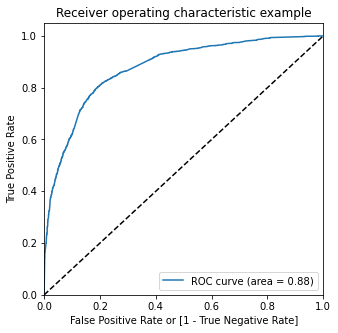

In [1684]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

### Finding Optimal cutoff point

#### Optimal cutoff probability is that probability where we get balanced sensitivity and specificity

In [1685]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.231366,7183,0,1,1,1,0,0,0,0,0,0,0
1,0,0.231366,1798,0,1,1,1,0,0,0,0,0,0,0
2,0,0.052223,1233,0,1,0,0,0,0,0,0,0,0,0
3,0,0.089927,2419,0,1,0,0,0,0,0,0,0,0,0
4,0,0.385748,7305,0,1,1,1,1,0,0,0,0,0,0


In [1686]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381204  1.000000  0.000000
0.1   0.1  0.595101  0.965141  0.367141
0.2   0.2  0.718860  0.926501  0.590944
0.3   0.3  0.796510  0.826543  0.778008
0.4   0.4  0.810599  0.760185  0.841656
0.5   0.5  0.809158  0.700966  0.875809
0.6   0.6  0.787704  0.575388  0.918499
0.7   0.7  0.775216  0.498950  0.945408
0.8   0.8  0.754723  0.403192  0.971281
0.9   0.9  0.706532  0.247795  0.989133


#### plot accuracy sensitivity and specificity for various probabilities.

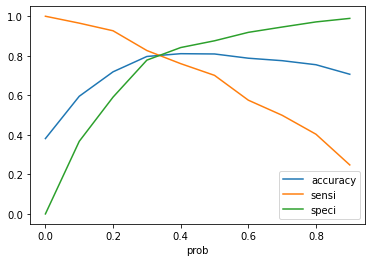

In [1687]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the above graph, it looks like the cutoff point a around 0.35

In [1688]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.231366,7183,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.231366,1798,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.052223,1233,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.089927,2419,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.385748,7305,0,1,1,1,1,0,0,0,0,0,0,1


In [1689]:
# check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8075568363752802

In [1690]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3146,  719],
       [ 483, 1898]], dtype=int64)

In [1691]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1692]:
# the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7971440571188576

In [1693]:
# calculate specificity
TN / float(TN+FP)

0.8139715394566623

In [1694]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.18602846054333766


In [1695]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7252579289262514


In [1696]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8669054836042988


### Precision and Recall

#### Checking the Confusion metrix once again

In [1697]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3385,  480],
       [ 712, 1669]], dtype=int64)

#### Presion = TP/TP+FP

In [1698]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7766402978129362

#### Recall = TP/TP+FN

In [1699]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7009659806803864

#### Using sklearn to do the same

In [1700]:
precision_score(y_train_pred_final.Converted,y_train_pred_final.Predicted)

0.7766402978129362

In [1701]:
recall_score(y_train_pred_final.Converted,y_train_pred_final.Predicted)

0.7009659806803864

### Precision and Recall Trade-off

In [1702]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

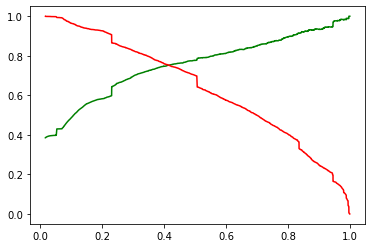

In [1703]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Making Predictions on the test set

### Scaling the test set

In [1704]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [1705]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Lead Origin_Lead Import
6038,-0.410141,0,0,0,1,0,0,0,0,1,0,0,0,0
7539,-0.019513,0,0,0,1,0,0,0,0,1,0,0,0,0
310,-0.508711,0,0,0,1,0,0,0,0,0,0,0,0,0
4412,-0.371809,0,0,0,1,0,0,0,0,0,0,0,0,0
9139,-0.421094,0,0,0,1,0,0,0,0,0,0,0,0,0


In [1706]:
X_test_sm = sm.add_constant(X_test)

### Making Predictions

In [1707]:
y_test_pred = result.predict(X_test_sm)

In [1708]:
y_test_pred[:10]

6038    0.312151
7539    0.417581
310     0.106146
4412    0.122342
9139    0.116280
815     0.287363
2697    0.090453
9206    0.829221
1531    0.016883
1431    0.072595
dtype: float64

#### Converting y_pred to a dataframe which is an array

In [1709]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [1710]:
# checking the head
y_pred_1.head()

,0
6038,0.312151
7539,0.417581
310,0.106146
4412,0.122342
9139,0.116280


#### Converting y_test to dataframe and adding the prospect ID column

In [1711]:
y_test_df = pd.DataFrame(y_test)

In [1712]:
y_test_df['Prospect ID'] = y_test_df.index

#### Removing index for both dataframes to append them side by side 

In [1713]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

#### Appending y_test_df and y_pred_1

In [1714]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [1715]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,6038,0.312151
1,1,7539,0.417581
2,0,310,0.106146
3,0,4412,0.122342
4,0,9139,0.116280


#### rename the column 0 as Converted_prob

In [1716]:
y_pred_final = y_pred_final.rename(columns={0:'Converted_prob'})

In [1717]:
# rearrange the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]

#### Making the Lead_Score column to assign a value to each lead

In [1718]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [1719]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,6038,0,0.312151,31
1,7539,1,0.417581,42
2,310,0,0.106146,11
3,4412,0,0.122342,12
4,9139,0,0.116280,12


### making the 'final_predicted' based on the converted prob of .35

In [1720]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.35 else 0)

In [1721]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_predicted
0,6038,0,0.312151,31,0
1,7539,1,0.417581,42,1
2,310,0,0.106146,11,0
3,4412,0,0.122342,12,0
4,9139,0,0.116280,12,0


### Checking the accuracy of the model

In [1722]:
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.806572068707991

#### as seen, the accuracy on the test model is very close to the accuracy on the train model.

## Confusion matrix

In [1723]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted,y_pred_final.final_predicted)
confusion2

array([[1404,  286],
       [ 232,  756]], dtype=int64)

In [1724]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

### Checking other metrics 

In [1725]:
# the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7651821862348178

In [1726]:
# calculate specificity
TN / float(TN+FP)

0.8307692307692308

In [1727]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.16923076923076924


In [1728]:
# Positive predictive value 
print (TP / float(TP+FP))

0.72552783109405


In [1729]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8581907090464548


### Precision and Recall

In [1730]:
precision_score(y_pred_final.Converted,y_pred_final.final_predicted)

0.72552783109405

In [1731]:
recall_score(y_pred_final.Converted,y_pred_final.final_predicted)

0.7651821862348178

# Final Observations

In [1732]:
# Checking the parameters and their value to the model
result.params.sort_values(ascending=False)

Lead Source_Welingak Website                            6.439660
Lead Source_Reference                                   4.199732
Last Notable Activity_Had a Phone Conversation          2.439575
Last Notable Activity_Unreachable                       1.969361
Lead Origin_Lead Import                                 1.444759
Lead Source_Olark Chat                                  1.372520
Last Activity_SMS Sent                                  1.225233
Total Time Spent on Website                             1.170855
Last Activity_Had a Phone Conversation                  1.049196
What is your current occupation_Working Professional    0.988228
const                                                   0.266553
What is your current occupation_Student                -1.478473
Last Activity_Olark Chat Conversation                  -1.683645
Last Activity_Email Bounced                            -1.697975
What is your current occupation_Unemployed             -1.801652
dtype: float64

### Comparing the values obtained from both the train set and the test set

### Train set

In [1733]:
# accuracy = 0.8091578610310599
# sensitivity = 0.7009659806803864
# specificity = 0.8758085381630013

### Test set

In [1734]:
# accuracy = 0.806572068707991
# sensitivity = 0.7651821862348178
# specificity = 0.8307692307692308

#### As seen above, all three values are similar in both train and test set which means that the model is performing well and can be used to make predictions.